# <center> Applied Programming Lab (Week 5) 

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,writers

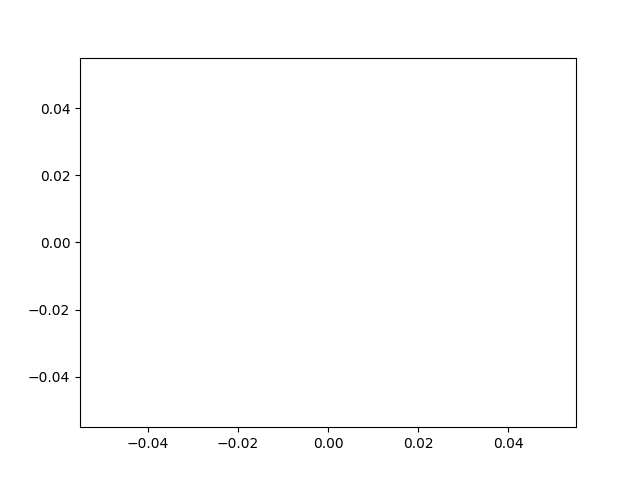

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    k = len(x)-1
    a = int(frame)
    if(frame<=5):
        xdata,ydata = morph(x[a+1],y[a+1],x[a],y[a],frame - a)
        ln.set_data(xdata,ydata)
    else:
        xdata,ydata = morph(x[2*k-a-1],y[2*k-a-1],x[2*k-a],y[2*k-a],frame-a)
        ln.set_data(xdata,ydata)
    return ln

Here I have defined an update function to pass through FuncAnimation. Our animation here will be going through 10 transitions, so I have divided the frame in 10 parts. Then we scale and shift the frame values such that we get 10 different morph animations. This way we can make the required function.

## Defining a function to genereate a polygon with given number of sides

In [3]:
def polyGen(sides,t):
    a = len(t)
    x_vert = []
    y_vert = []
    for i in range(sides):
        k = (a*(i+1))//sides - (a*i)//sides
        x_1 = np.cos(2*np.pi*i/sides)
        x_2 = np.cos(2*np.pi*(i+1)/sides)
        x_t = np.linspace(x_1,x_2,k)
        for t in x_t:
            x_vert.append(t)
        y_1 = np.sin(2*np.pi*i/sides)
        y_2 = np.sin(2*np.pi*(i+1)/sides)
        y_t = np.linspace(y_1,y_2,k)
        for t in y_t:
            y_vert.append(t)
    x_vert = np.array(x_vert)
    y_vert = np.array(y_vert)
    return x_vert,y_vert


Here I have created a function called polyGen which generates a polygon with given number of sides(all vertexes lie on a unit circle). First we mark all the vertices on the unit circle. The vertex (1,0) is fixed in all polygons. Then we take two consecutive vertex and define a certain number of points on a line joining them. When we plot the output, we get a uniform polygon with required number of sides.

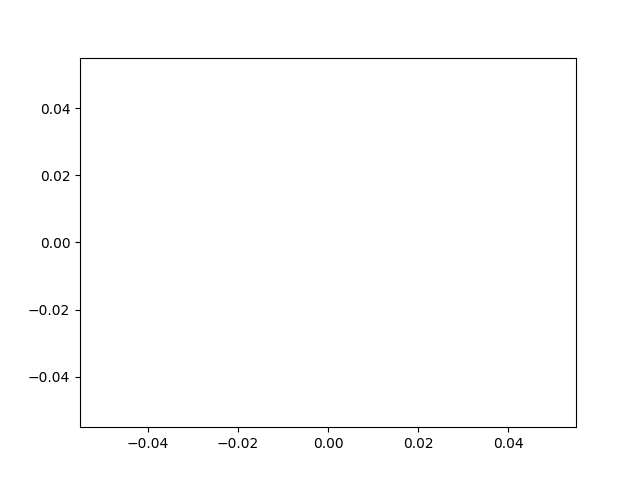

In [4]:
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym
t = np.linspace(0, 2*np.pi, 200)
x = []
y = []
for i in range(6):
    xt,yt = polyGen(i+3,t)
    x.append(xt)
    y.append(yt)
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 1280),init_func=init, blit=True, interval=10, repeat=True)
plt.show()

We can see from the final output video that my animation is different from the refernce animation. In my animation we have a set of 200 points. For a triangle the 66th point is one vertex. But for the square, first vertex coincides with the 50th point. So hence when we morph the polygons, the animation shows the edge being split.
In the reference video, it is the vertices that are splitting instead of edges. 